In [2]:
#test
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.10"):
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "2.2.5", 'matplotlib': "3.10.1",'sklearn': "1.6.1", 
                'pandas': "2.2.3",'xgboost': "3.0.0", 'shap': "0.47.2", 
                'polars': "1.27.1", 'seaborn': "0.13.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.10

[ OK ] numpy version 2.2.5 is installed.
[ OK ] matplotlib version 3.10.1 is installed.
[ OK ] sklearn version 1.6.1 is installed.
[ OK ] pandas version 2.2.3 is installed.
[ OK ] xgboost version 3.0.0 is installed.
[ OK ] shap version 0.47.2 is installed.
[ OK ] polars version 1.27.1 is installed.
[ OK ] seaborn version 0.13.2 is installed.


Number of rows: 1433
Numer of columns: 61
Are you self-employed?                                                                                                                                                                int64
How many employees does your company or organization have?                                                                                                                           object
Is your employer primarily a tech company/organization?                                                                                                                             float64
Is your primary role within your company related to tech/IT?                                                                                                                        float64
Does your employer provide mental health benefits as part of healthcare coverage?                                                                                                    object
Do you know the op

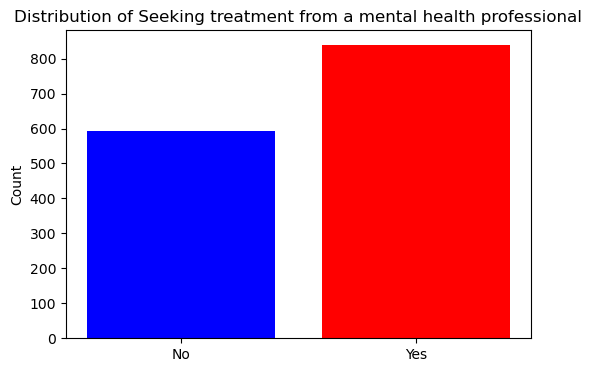

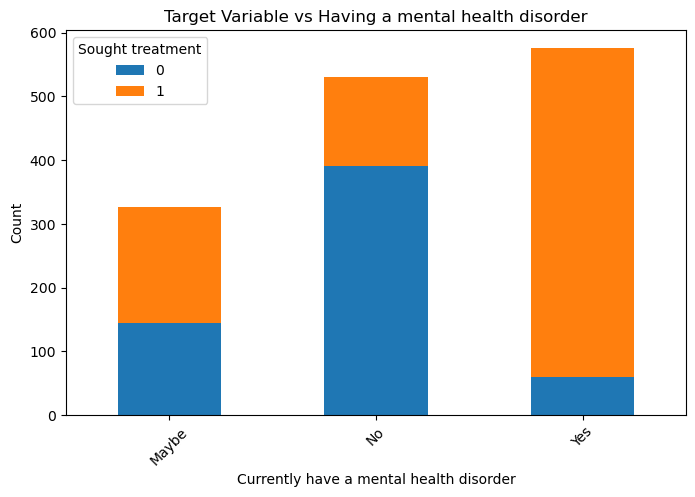

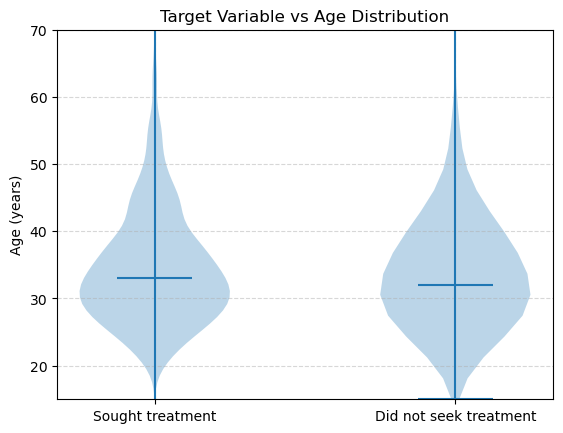

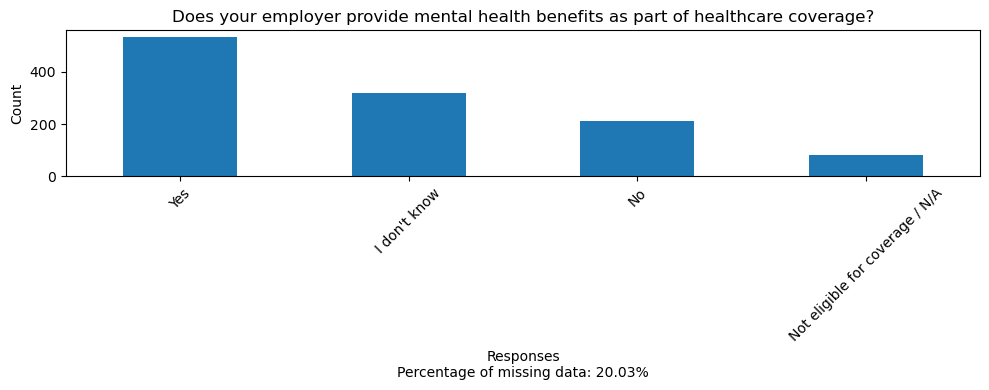

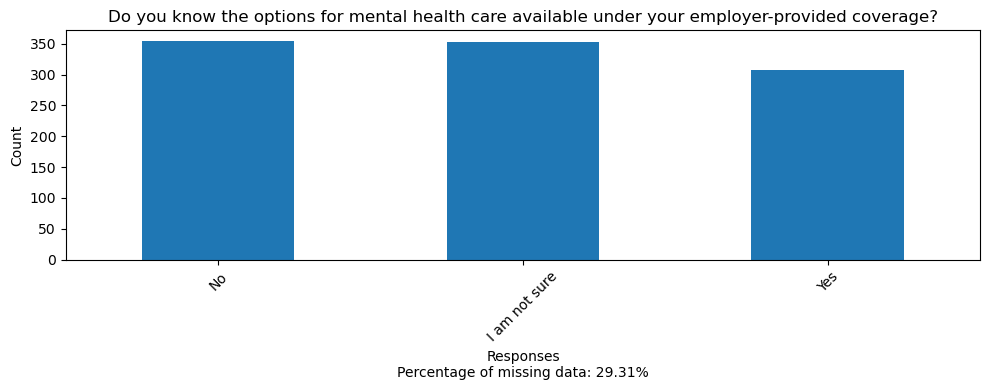

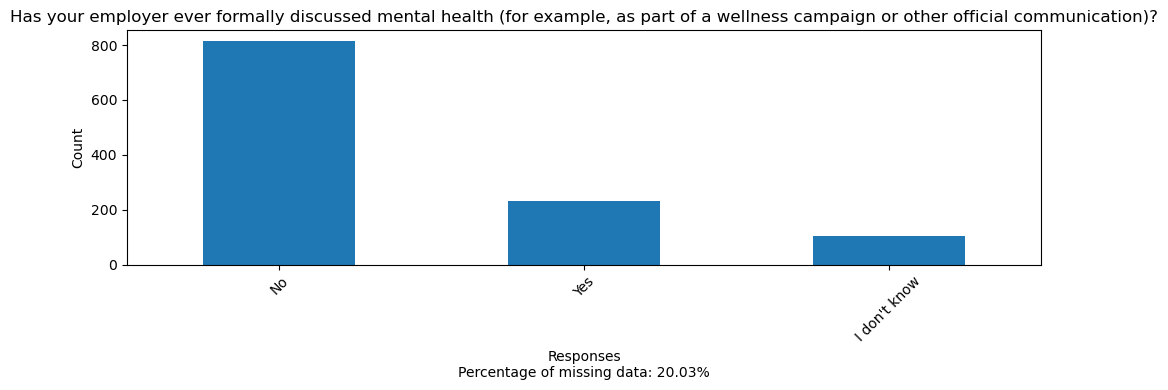

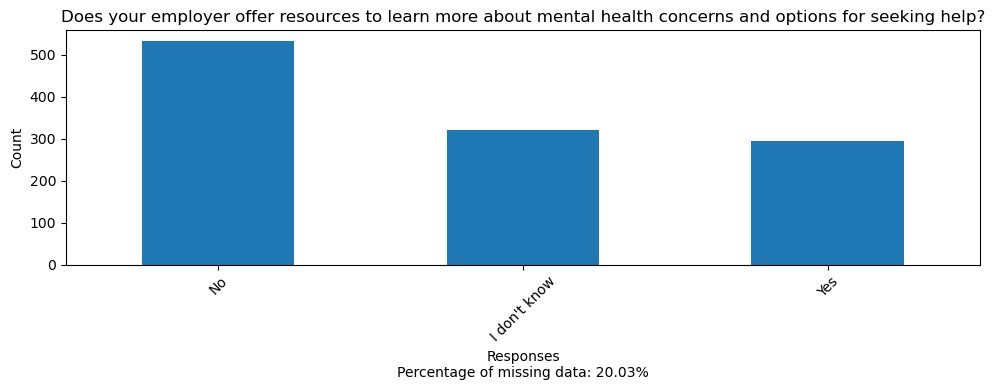

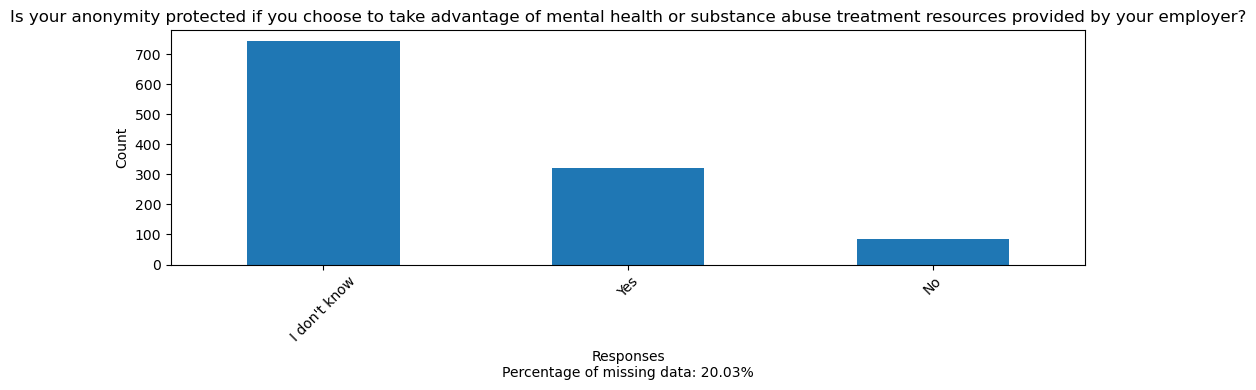

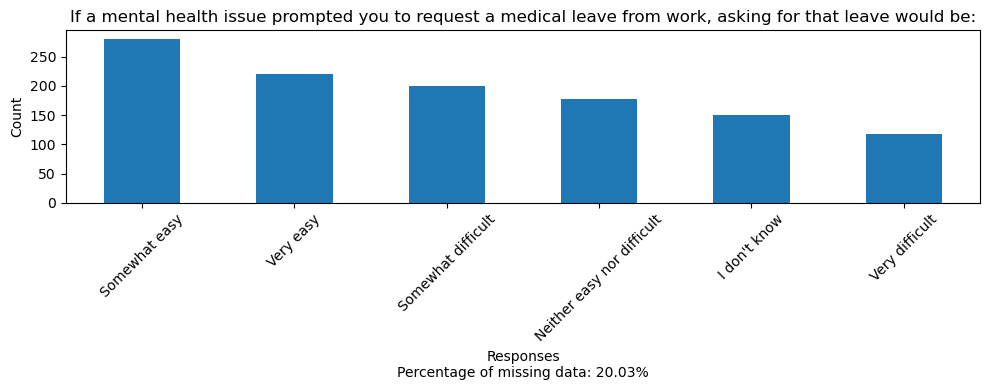

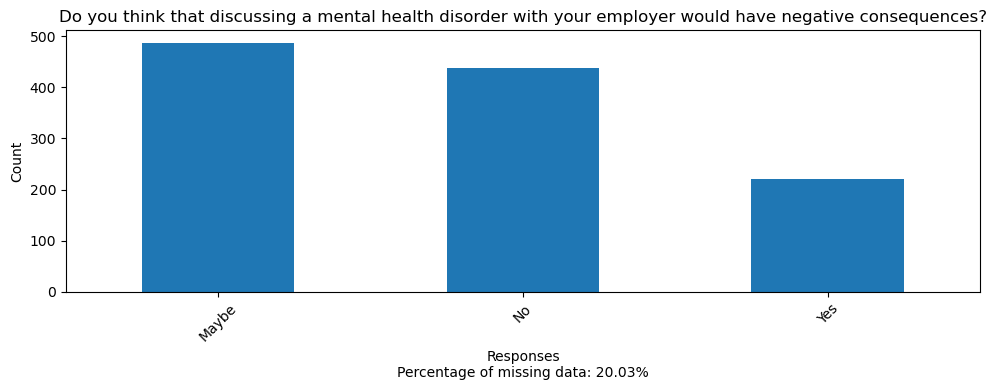

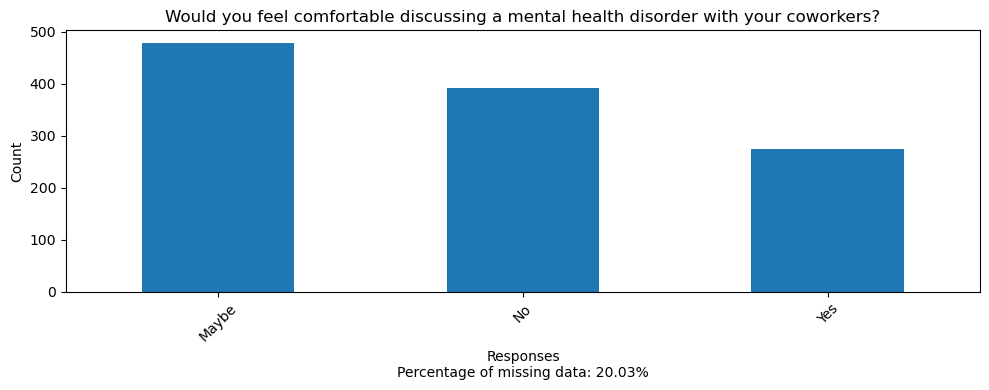

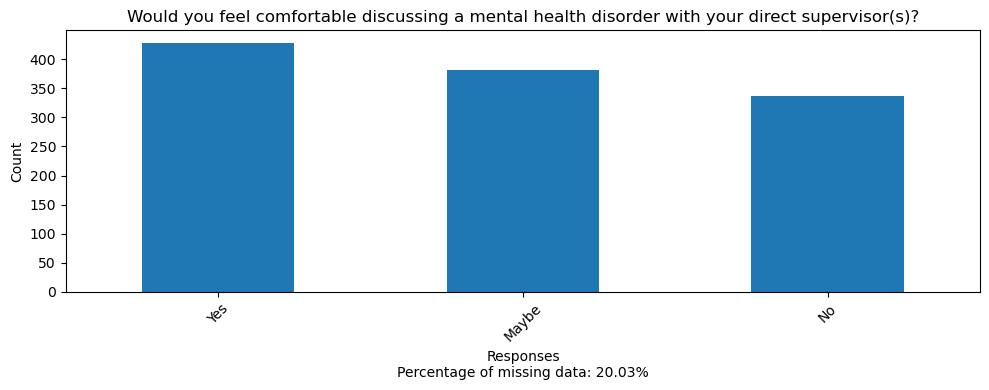

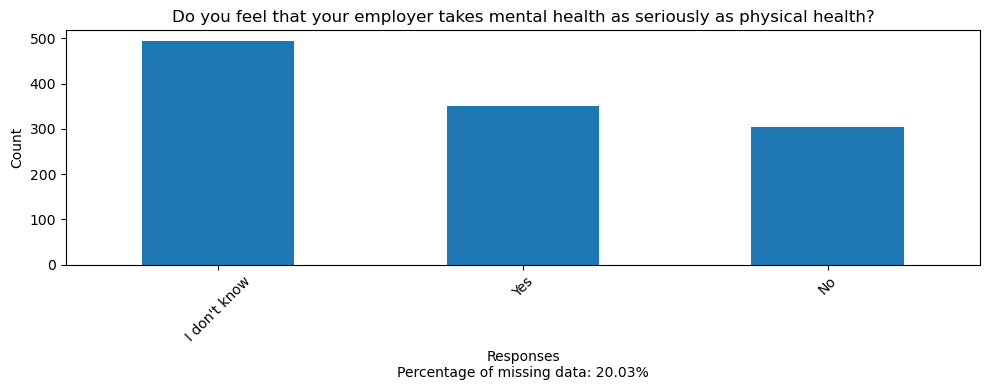

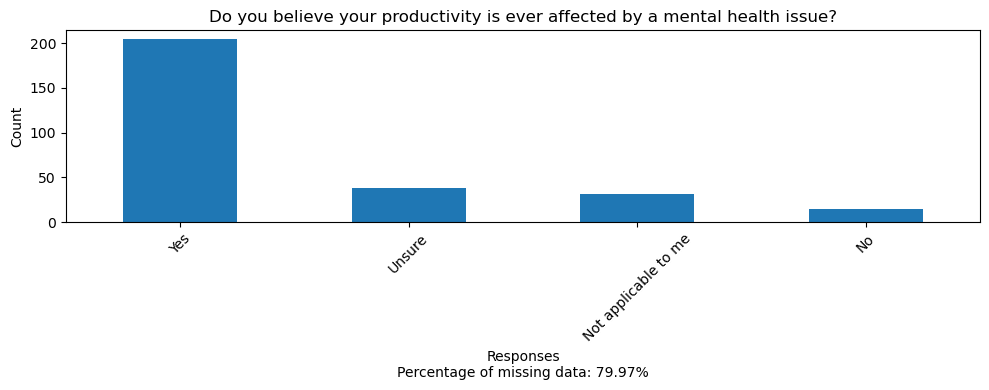

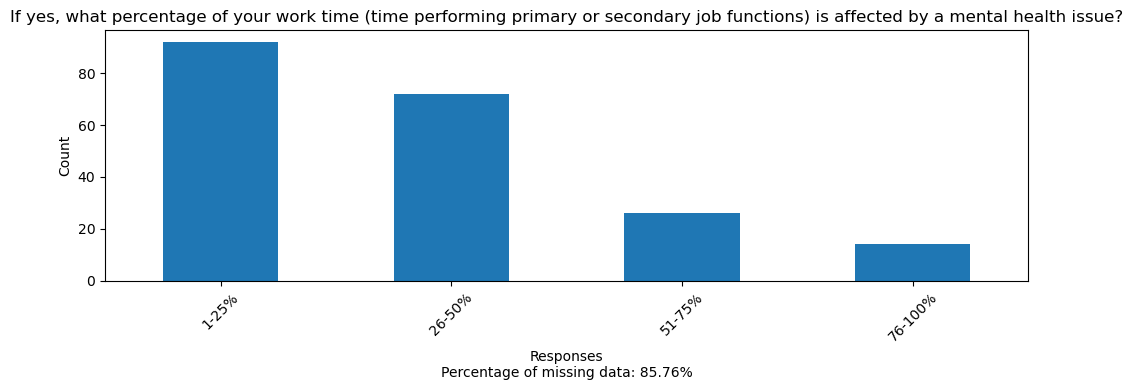

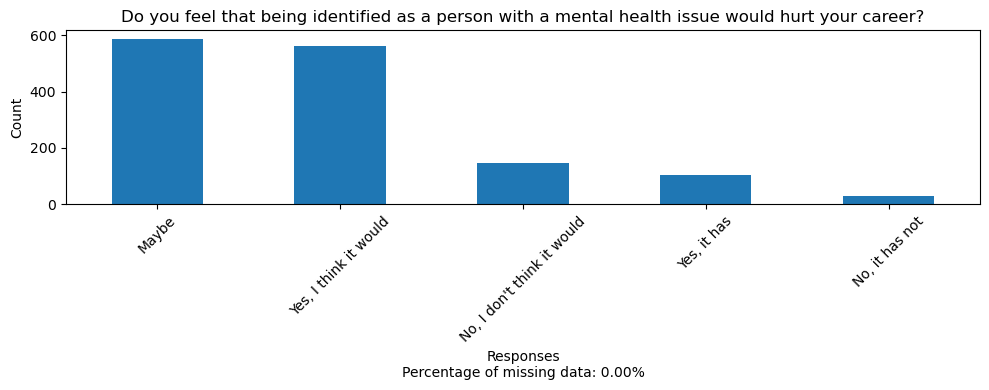

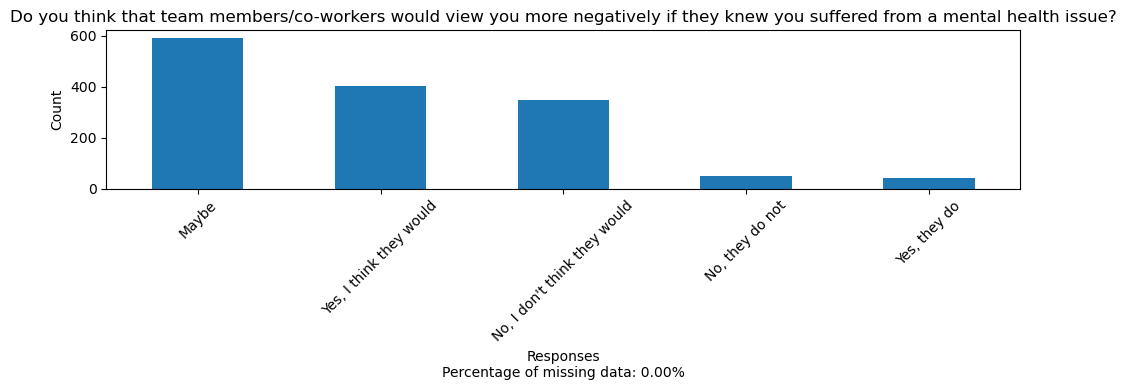

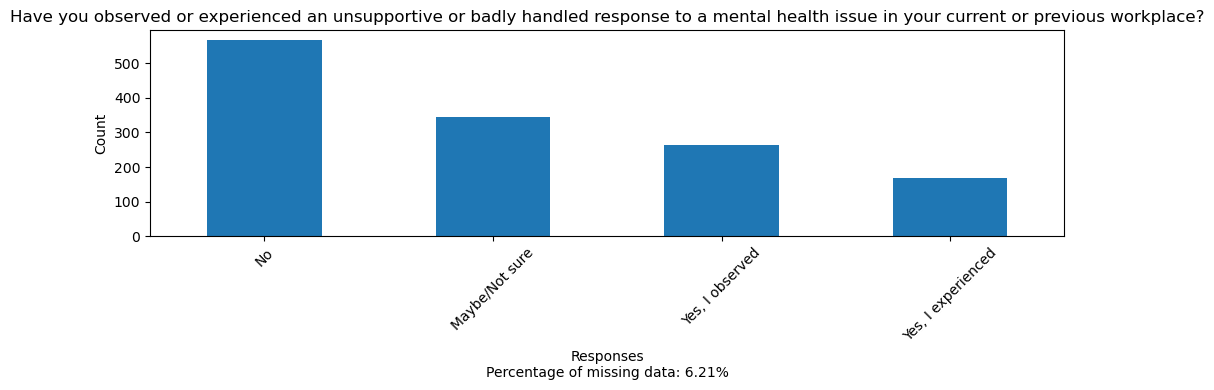

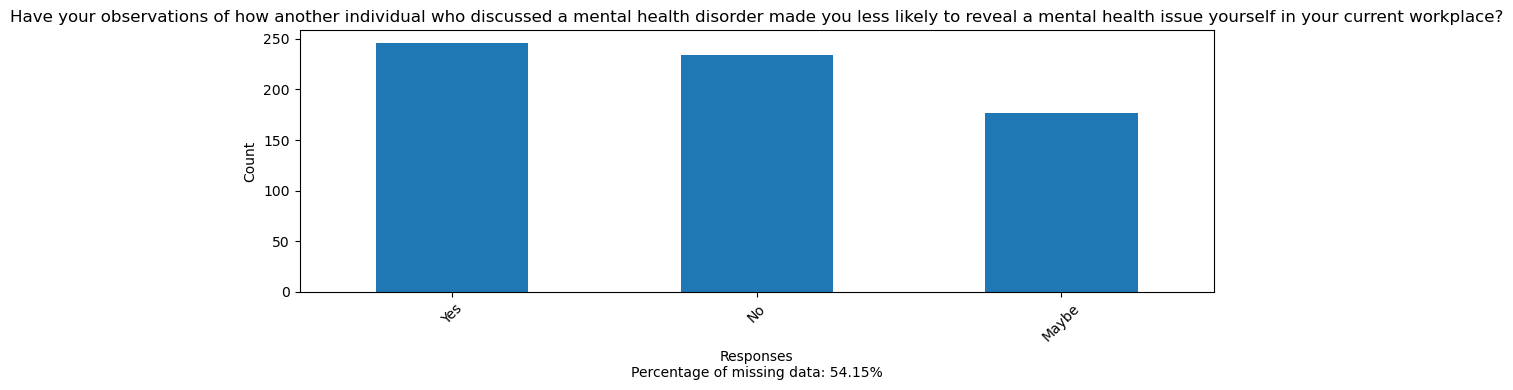

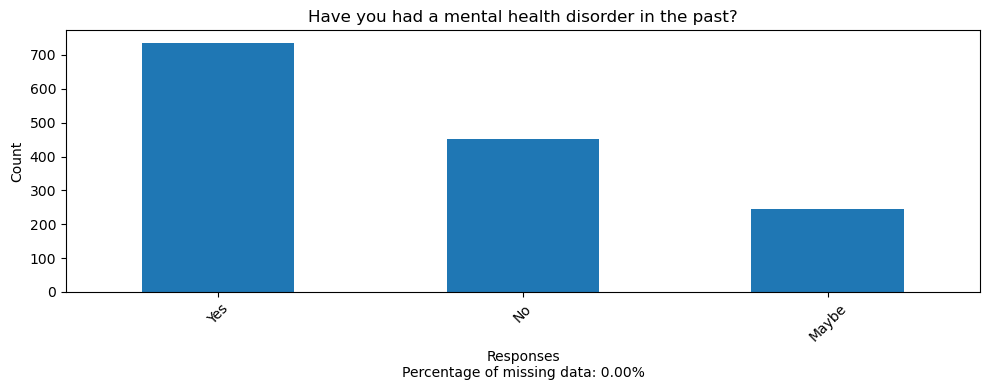

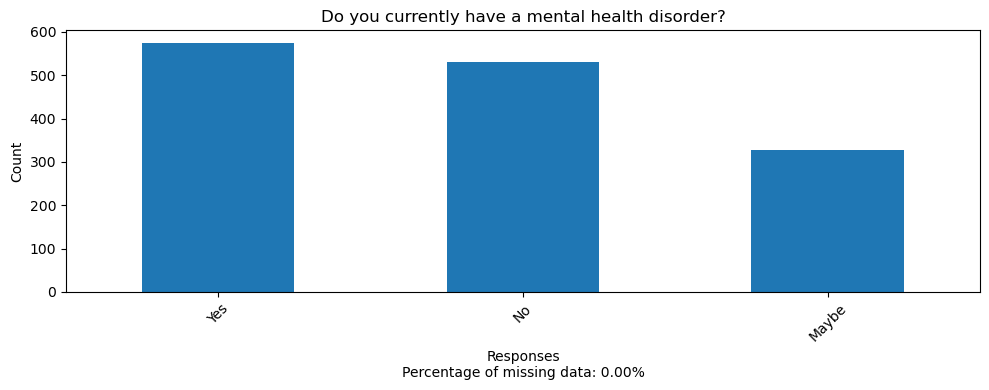

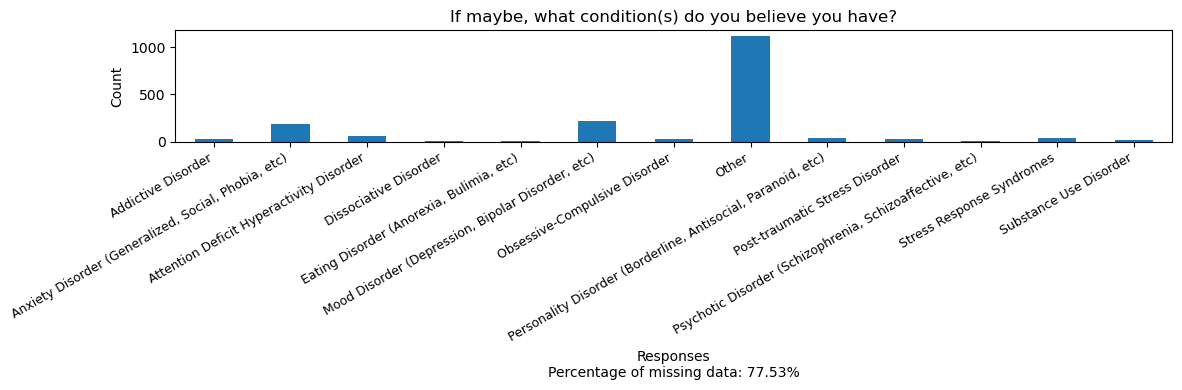

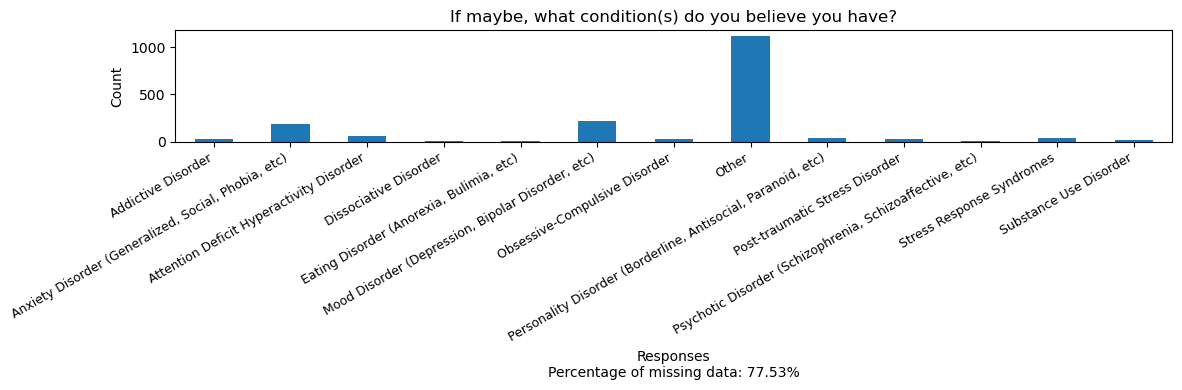

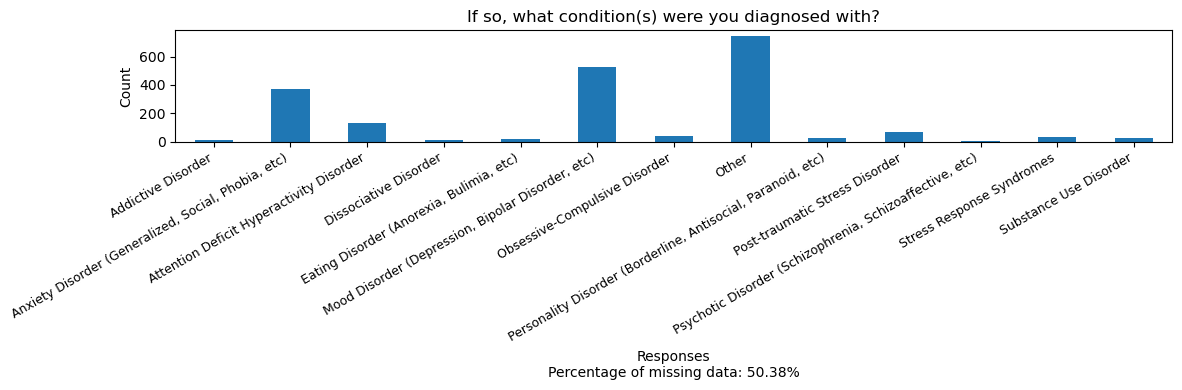

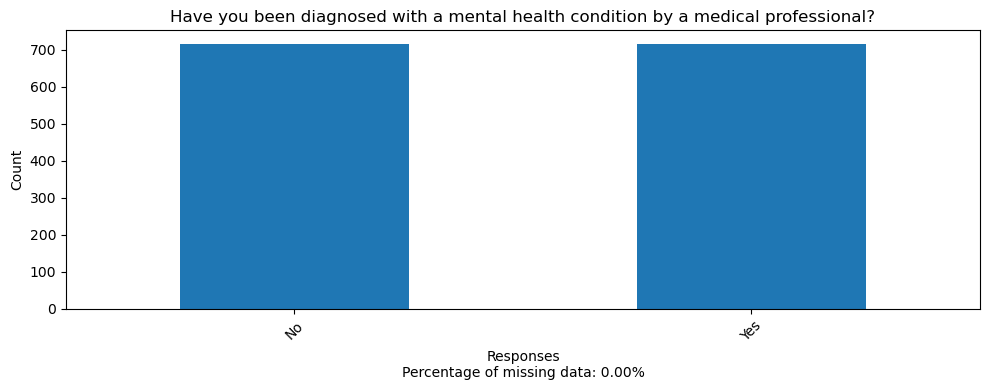

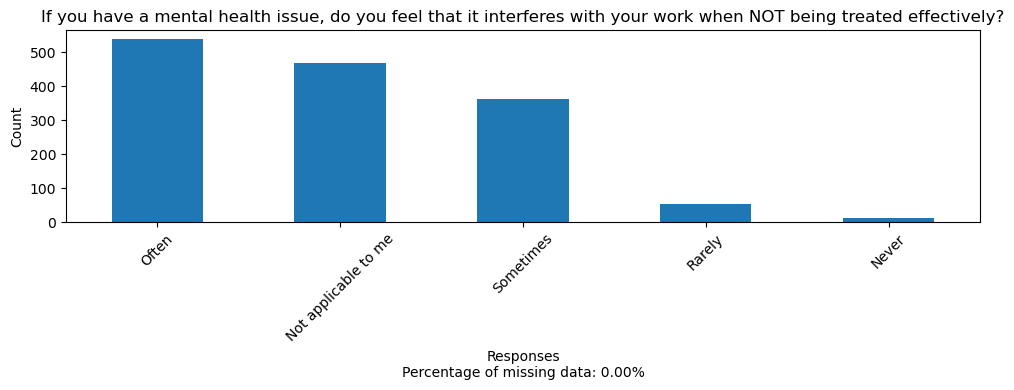

In [3]:

import pandas as pd 
import matplotlib
from matplotlib import pylab as plt
from sklearn.model_selection import KFold, train_test_split

#file = pd.read_csv(r"C:\Users\isade\OneDrive\Desktop\data1030\data1030-fall2025\project\data\mental-heath-in-tech-2016_20161114.csv")
file = pd.read_csv(
    r"C:\Users\isade\OneDrive\Desktop\data1030\data1030-fall2025\project\data\mental-heath-in-tech-2016_20161114.csv",
    encoding='latin1'  # or 'ISO-8859-1'
)

# #clean column names
# file.columns = (
#     file.columns
#     .str.strip()        # remove leading/trailing spaces
#     .str.replace('\xa0', ' ')  # replace non-breaking space with normal space
#     .str.replace('\n', ' ')    # remove any newline characters
# )

# # Print all column names to verify
# print(list(file.columns))

# drop the free response section - not useful for a machine learning algorithm
dropped_columns= ['Why or why not?', 'Why or why not?.1' ]
df = file.drop(dropped_columns, axis =1)


# prepare the feature matrix X
X = df.drop(columns = "Have you ever sought treatment for a mental health issue from a mental health professional?")

# prepare the target variable y
y = df["Have you ever sought treatment for a mental health issue from a mental health professional?"]

 
print("Number of rows:", len(df))
print("Numer of columns:",len(df.columns))


pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)
print(df.dtypes)

#visualizing target variable 
counts = df['Have you ever sought treatment for a mental health issue from a mental health professional?'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values, color=["blue", "red"])
plt.xticks([0, 1], ["No", "Yes"])
plt.ylabel("Count")
plt.title("Distribution of Seeking treatment from a mental health professional")
plt.show()

#categorical vs target variable 
counts = (
    df
    .groupby(["Do you currently have a mental health disorder?",
              "Have you ever sought treatment for a mental health issue from a mental health professional?"])
    .size()
    .unstack(fill_value=0)
)

counts.plot(kind='bar', stacked= True, figsize= (8,5))
plt.ylabel("Count")
plt.xlabel("Currently have a mental health disorder")
plt.title("Target Variable vs Having a mental health disorder")
plt.xticks(rotation=45)
plt.legend(title = "Sought treatment")
plt.show()

#continuous vs target variable 
age_treatment = df[df["Have you ever sought treatment for a mental health issue from a mental health professional?"] == 1]["What is your age?"]
age_no_treatment = df[df["Have you ever sought treatment for a mental health issue from a mental health professional?"] == 0]["What is your age?"]

plt.violinplot(
    [age_treatment, age_no_treatment],
    showmeans=False,
    showmedians=True,
    showextrema=True
)

plt.xticks([1, 2], ["Sought treatment", "Did not seek treatment"])
plt.ylabel("Age (years)")
plt.title("Target Variable vs Age Distribution")
plt.ylim(15, 70)

plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


#Does your employer provide mental health benefits as part of healthcare coverage?
df["Does your employer provide mental health benefits as part of healthcare coverage?"].value_counts().plot(kind="bar", figsize=(10,4))

missing_count = 0

for value in df["Does your employer provide mental health benefits as part of healthcare coverage?"]:
    if(pd.isna(value) or value == ''):
        missing_count+=1

percent_missing = (missing_count/ len(df["Does your employer provide mental health benefits as part of healthcare coverage?"]))

plt.xlabel(f"Responses\nPercentage of missing data: {percent_missing:.2%}")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Does your employer provide mental health benefits as part of healthcare coverage?")
plt.tight_layout()
plt.show()

# Do you know the options for mental health care available under your employer-provided coverage?
df["Do you know the options for mental health care available under your employer-provided coverage?"].value_counts().plot(kind="bar", figsize=(10,4))
missing_count = 0

for value in df["Do you know the options for mental health care available under your employer-provided coverage?"]:
    if(pd.isna(value) or value == ''):
        missing_count+=1

percent_missing = (missing_count/ len(df["Do you know the options for mental health care available under your employer-provided coverage?"]))

plt.xlabel(f"Responses\nPercentage of missing data: {percent_missing:.2%}")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Do you know the options for mental health care available under your employer-provided coverage?")
plt.tight_layout()
plt.show()

# Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
df["Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?"].value_counts().plot(kind="bar", figsize=(10,4))
missing_count = 0

for value in df["Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?"]:
    if(pd.isna(value) or value == ''):
        missing_count+=1

percent_missing = (missing_count/ len(df["Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?"]))

plt.xlabel(f"Responses\nPercentage of missing data: {percent_missing:.2%}")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?")
plt.tight_layout()
plt.show()

# Does your employer offer resources to learn more about mental health concerns and options for seeking help?
df["Does your employer offer resources to learn more about mental health concerns and options for seeking help?"].value_counts().plot(kind="bar", figsize=(10,4))
missing_count = 0

for value in df["Does your employer offer resources to learn more about mental health concerns and options for seeking help?"]:
    if(pd.isna(value) or value == ''):
        missing_count+=1

percent_missing = (missing_count/ len(df["Does your employer offer resources to learn more about mental health concerns and options for seeking help?"]))

plt.xlabel(f"Responses\nPercentage of missing data: {percent_missing:.2%}")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Does your employer offer resources to learn more about mental health concerns and options for seeking help?")
plt.tight_layout()
plt.show()

# Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
df["Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?"].value_counts().plot(kind="bar", figsize=(10,4))
missing_count = 0

for value in df["Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?"]:
    if(pd.isna(value) or value == ''):
        missing_count+=1

percent_missing = (missing_count/ len(df["Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?"]))

plt.xlabel(f"Responses\nPercentage of missing data: {percent_missing:.2%}")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?")
plt.tight_layout()
plt.show()

# If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
df["If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:"].value_counts().plot(kind="bar", figsize=(10,4))
missing_count = 0

for value in df["If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:"]:
    if(pd.isna(value) or value == ''):
        missing_count+=1

percent_missing = (missing_count/ len(df["If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:"]))

plt.xlabel(f"Responses\nPercentage of missing data: {percent_missing:.2%}")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:")
plt.tight_layout()
plt.show()

# Do you think that discussing a mental health disorder with your employer would have negative consequences?
df["Do you think that discussing a mental health disorder with your employer would have negative consequences?"].value_counts().plot(kind="bar", figsize=(10,4))
missing_count = 0

for value in df["Do you think that discussing a mental health disorder with your employer would have negative consequences?"]:
    if(pd.isna(value) or value == ''):
        missing_count+=1

percent_missing = (missing_count/ len(df["Do you think that discussing a mental health disorder with your employer would have negative consequences?"]))

plt.xlabel(f"Responses\nPercentage of missing data: {percent_missing:.2%}")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Do you think that discussing a mental health disorder with your employer would have negative consequences?")
plt.tight_layout()
plt.show()

# Would you feel comfortable discussing a mental health disorder with your coworkers?
df["Would you feel comfortable discussing a mental health disorder with your coworkers?"].value_counts().plot(kind="bar", figsize=(10,4))
missing_count = 0

for value in df["Would you feel comfortable discussing a mental health disorder with your coworkers?"]:
    if(pd.isna(value) or value == ''):
        missing_count+=1

percent_missing = (missing_count/ len(df["Would you feel comfortable discussing a mental health disorder with your coworkers?"]))

plt.xlabel(f"Responses\nPercentage of missing data: {percent_missing:.2%}")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Would you feel comfortable discussing a mental health disorder with your coworkers?")
plt.tight_layout()
plt.show()

# Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?
df["Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?"].value_counts().plot(kind="bar", figsize=(10,4))
missing_count = 0

for value in df["Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?"]:
    if(pd.isna(value) or value == ''):
        missing_count+=1

percent_missing = (missing_count/ len(df["Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?"]))

plt.xlabel(f"Responses\nPercentage of missing data: {percent_missing:.2%}")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?")
plt.tight_layout()
plt.show()

# Do you feel that your employer takes mental health as seriously as physical health?
df["Do you feel that your employer takes mental health as seriously as physical health?"].value_counts().plot(kind="bar", figsize=(10,4))
missing_count = 0

for value in df["Do you feel that your employer takes mental health as seriously as physical health?"]:
    if(pd.isna(value) or value == ''):
        missing_count+=1

percent_missing = (missing_count/ len(df["Do you feel that your employer takes mental health as seriously as physical health?"]))

plt.xlabel(f"Responses\nPercentage of missing data: {percent_missing:.2%}")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Do you feel that your employer takes mental health as seriously as physical health?")
plt.tight_layout()
plt.show()

# Do you believe your productivity is ever affected by a mental health issue?
df["Do you believe your productivity is ever affected by a mental health issue?"].value_counts().plot(kind="bar", figsize=(10,4))
missing_count = 0

for value in df["Do you believe your productivity is ever affected by a mental health issue?"]:
    if(pd.isna(value) or value == ''):
        missing_count+=1

percent_missing = (missing_count/ len(df["Do you believe your productivity is ever affected by a mental health issue?"]))

plt.xlabel(f"Responses\nPercentage of missing data: {percent_missing:.2%}")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Do you believe your productivity is ever affected by a mental health issue?")
plt.tight_layout()
plt.show()

# If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?
df["If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?"].value_counts().plot(kind="bar", figsize=(10,4))
missing_count = 0

for value in df["If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?"]:
    if(pd.isna(value) or value == ''):
        missing_count+=1

percent_missing = (missing_count/ len(df["If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?"]))

plt.xlabel(f"Responses\nPercentage of missing data: {percent_missing:.2%}")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?")
plt.tight_layout()
plt.show()


# Do you feel that being identified as a person with a mental health issue would hurt your career?
df["Do you feel that being identified as a person with a mental health issue would hurt your career?"].value_counts().plot(kind="bar", figsize=(10,4))
missing_count = 0

for value in df["Do you feel that being identified as a person with a mental health issue would hurt your career?"]:
    if(pd.isna(value) or value == ''):
        missing_count+=1

percent_missing = (missing_count/ len(df["Do you feel that being identified as a person with a mental health issue would hurt your career?"]))

plt.xlabel(f"Responses\nPercentage of missing data: {percent_missing:.2%}")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Do you feel that being identified as a person with a mental health issue would hurt your career?")
plt.tight_layout()
plt.show()

# Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?
df["Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?"].value_counts().plot(kind="bar", figsize=(10,4))
missing_count = 0

for value in df["Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?"]:
    if(pd.isna(value) or value == ''):
        missing_count+=1

percent_missing = (missing_count/ len(df["Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?"]))

plt.xlabel(f"Responses\nPercentage of missing data: {percent_missing:.2%}")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?")
plt.tight_layout()
plt.show()

# Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?
df["Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?"].value_counts().plot(kind="bar", figsize=(10,4))
missing_count = 0

for value in df["Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?"]:
    if(pd.isna(value) or value == ''):
        missing_count+=1

percent_missing = (missing_count/ len(df["Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?"]))

plt.xlabel(f"Responses\nPercentage of missing data: {percent_missing:.2%}")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?")
plt.tight_layout()
plt.show()

# Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?
df["Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?"].value_counts().plot(kind="bar", figsize=(10,4))
missing_count = 0

for value in df["Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?"]:
    if(pd.isna(value) or value == ''):
        missing_count+=1

percent_missing = (missing_count/ len(df["Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?"]))

plt.xlabel(f"Responses\nPercentage of missing data: {percent_missing:.2%}")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?")
plt.tight_layout()
plt.show()

# Have you had a mental health disorder in the past?
df["Have you had a mental health disorder in the past?"].value_counts().plot(kind="bar", figsize=(10,4))
missing_count = 0

for value in df["Have you had a mental health disorder in the past?"]:
    if(pd.isna(value) or value == ''):
        missing_count+=1

percent_missing = (missing_count/ len(df["Have you had a mental health disorder in the past?"]))

plt.xlabel(f"Responses\nPercentage of missing data: {percent_missing:.2%}")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Have you had a mental health disorder in the past?")
plt.tight_layout()
plt.show()

# Do you currently have a mental health disorder?
df["Do you currently have a mental health disorder?"].value_counts().plot(kind="bar", figsize=(10,4))
missing_count = 0

for value in df["Do you currently have a mental health disorder?"]:
    if(pd.isna(value) or value == ''):
        missing_count+=1

percent_missing = (missing_count/ len(df["Do you currently have a mental health disorder?"]))

plt.xlabel(f"Responses\nPercentage of missing data: {percent_missing:.2%}")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Do you currently have a mental health disorder?")
plt.tight_layout()
plt.show()

# # If yes, what condition(s) have you been diagnosed with?
split_reps_2 = []

for i in df["If maybe, what condition(s) do you believe you have?"]:
    # if pd.isna(i):
    #     continue
    val = str(i).split("|")
    split_reps_2.extend(val)


bins = {
"Mood Disorder (Depression, Bipolar Disorder, etc)": ["Mood Disorder (Depression, Bipolar Disorder, etc)"],
"Anxiety Disorder (Generalized, Social, Phobia, etc)": ["Anxiety Disorder (Generalized, Social, Phobia, etc)"],
"Attention Deficit Hyperactivity Disorder": ["Attention Deficit Hyperactivity Disorder"],
"Post-traumatic Stress Disorder": ["Post-traumatic Stress Disorder"],
"Obsessive-Compulsive Disorder": ["Obsessive-Compulsive Disorder"],
"Substance Use Disorder": ["Substance Use Disorder"],
"Personality Disorder (Borderline, Antisocial, Paranoid, etc)": ["Personality Disorder (Borderline, Antisocial, Paranoid, etc)"],
"Stress Response Syndromes":["Stress Response Syndromes"],
"Addictive Disorder":["Addictive Disorder"],
"Eating Disorder (Anorexia, Bulimia, etc)":["Eating Disorder (Anorexia, Bulimia, etc)"],
"Dissociative Disorder":["Dissociative Disorder"],
"Psychotic Disorder (Schizophrenia, Schizoaffective, etc)":["Psychotic Disorder (Schizophrenia, Schizoaffective, etc)"],
"Other" : []
}

reps = pd.DataFrame({"Responses": split_reps_2})

def organize_cats(rep):
    for c, phrase in bins.items():
        if rep in phrase:
            return c 
    return "Other"

reps["Category"] = reps["Responses"].apply(organize_cats
                                          )
to_plot = reps["Category"].value_counts().sort_index()

to_plot.plot(kind ="bar", figsize=(12,4))

missing_count = 0

for value in df["If maybe, what condition(s) do you believe you have?"]:
    if(pd.isna(value) or value == ''):
        missing_count+=1

percent_missing = (missing_count/ len(df["If maybe, what condition(s) do you believe you have?"]))

plt.xlabel(f"Responses\nPercentage of missing data: {percent_missing:.2%}")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right", fontsize=9)
plt.title("If maybe, what condition(s) do you believe you have?")
plt.tight_layout()
plt.show()

#If maybe, what condition(s) do you believe you have?
split_reps_1 = []

for i in df["If maybe, what condition(s) do you believe you have?"]:
    # if pd.isna(i):
    #     continue
    val = str(i).split("|")
    split_reps_1.extend(val)


bins = {
"Mood Disorder (Depression, Bipolar Disorder, etc)": ["Mood Disorder (Depression, Bipolar Disorder, etc)"],
"Anxiety Disorder (Generalized, Social, Phobia, etc)": ["Anxiety Disorder (Generalized, Social, Phobia, etc)"],
"Attention Deficit Hyperactivity Disorder": ["Attention Deficit Hyperactivity Disorder"],
"Post-traumatic Stress Disorder": ["Post-traumatic Stress Disorder"],
"Obsessive-Compulsive Disorder": ["Obsessive-Compulsive Disorder"],
"Substance Use Disorder": ["Substance Use Disorder"],
"Personality Disorder (Borderline, Antisocial, Paranoid, etc)": ["Personality Disorder (Borderline, Antisocial, Paranoid, etc)"],
"Stress Response Syndromes":["Stress Response Syndromes"],
"Addictive Disorder":["Addictive Disorder"],
"Eating Disorder (Anorexia, Bulimia, etc)":["Eating Disorder (Anorexia, Bulimia, etc)"],
"Dissociative Disorder":["Dissociative Disorder"],
"Psychotic Disorder (Schizophrenia, Schizoaffective, etc)":["Psychotic Disorder (Schizophrenia, Schizoaffective, etc)"],
"Other" : []
}

reps = pd.DataFrame({"Responses": split_reps_1})

def organize_cats(rep):
    for c, phrase in bins.items():
        if rep in phrase:
            return c 
    return "Other"

reps["Category"] = reps["Responses"].apply(organize_cats
                                          )
to_plot = reps["Category"].value_counts().sort_index()

to_plot.plot(kind ="bar", figsize=(12,4))
missing_count = 0

for value in df["If maybe, what condition(s) do you believe you have?"]:
    if(pd.isna(value) or value == ''):
        missing_count+=1

percent_missing = (missing_count/ len(df["If maybe, what condition(s) do you believe you have?"]))

plt.xlabel(f"Responses\nPercentage of missing data: {percent_missing:.2%}")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right", fontsize=9)
plt.title("If maybe, what condition(s) do you believe you have?")
plt.tight_layout()
plt.show()

# # If so, what condition(s) were you diagnosed with?
split_reps = []

for i in df["If so, what condition(s) were you diagnosed with?"]:
    # if pd.isna(i):
    #     continue
    val = str(i).split("|")
    split_reps.extend(val)

bins = {
"Mood Disorder (Depression, Bipolar Disorder, etc)": ["Mood Disorder (Depression, Bipolar Disorder, etc)"],
"Anxiety Disorder (Generalized, Social, Phobia, etc)": ["Anxiety Disorder (Generalized, Social, Phobia, etc)"],
"Attention Deficit Hyperactivity Disorder": ["Attention Deficit Hyperactivity Disorder"],
"Post-traumatic Stress Disorder": ["Post-traumatic Stress Disorder"],
"Obsessive-Compulsive Disorder": ["Obsessive-Compulsive Disorder"],
"Substance Use Disorder": ["Substance Use Disorder"],
"Personality Disorder (Borderline, Antisocial, Paranoid, etc)": ["Personality Disorder (Borderline, Antisocial, Paranoid, etc)"],
"Stress Response Syndromes":["Stress Response Syndromes"],
"Addictive Disorder":["Addictive Disorder"],
"Eating Disorder (Anorexia, Bulimia, etc)":["Eating Disorder (Anorexia, Bulimia, etc)"],
"Dissociative Disorder":["Dissociative Disorder"],
"Psychotic Disorder (Schizophrenia, Schizoaffective, etc)":["Psychotic Disorder (Schizophrenia, Schizoaffective, etc)"],
"Other" : []
}

reps = pd.DataFrame({"Responses": split_reps})

def organize_cats(rep):
    for c, phrase in bins.items():
        if rep in phrase:
            return c 
    return "Other"

reps["Category"] = reps["Responses"].apply(organize_cats
                                          )
to_plot = reps["Category"].value_counts().sort_index()

to_plot.plot(kind ="bar", figsize=(12,4))
missing_count = 0

for value in df["If so, what condition(s) were you diagnosed with?"]:
    if(pd.isna(value) or value == ''):
        missing_count+=1

percent_missing = (missing_count/ len(df["If so, what condition(s) were you diagnosed with?"]))

plt.xlabel(f"Responses\nPercentage of missing data: {percent_missing:.2%}")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right", fontsize=9)
plt.title("If so, what condition(s) were you diagnosed with?")
plt.tight_layout()
plt.show()

# Have you been diagnosed with a mental health condition by a medical professional?
df["Have you been diagnosed with a mental health condition by a medical professional?"].value_counts().plot(kind="bar", figsize=(10,4))
missing_count = 0

for value in df["Have you been diagnosed with a mental health condition by a medical professional?"]:
    if(pd.isna(value) or value == ''):
        missing_count+=1

percent_missing = (missing_count/ len(df["Have you been diagnosed with a mental health condition by a medical professional?"]))

plt.xlabel(f"Responses\nPercentage of missing data: {percent_missing:.2%}")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Have you been diagnosed with a mental health condition by a medical professional?")
plt.tight_layout()
plt.show()

# If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?
df["If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?"].value_counts().plot(kind="bar", figsize=(10,4))
missing_count = 0

for value in df["If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?"]:
    if(pd.isna(value) or value == ''):
        missing_count+=1

percent_missing = (missing_count/ len(df["If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?"]))

plt.xlabel(f"Responses\nPercentage of missing data: {percent_missing:.2%}")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?")
plt.tight_layout()
plt.show()



In [4]:
#K-fold data splitting 
random_state = 42
# first split to separate out the test set
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)
print(X_other.shape,y_other.shape)
print('test set:',X_test.shape,y_test.shape)

kf = KFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('   training set:',X_train.shape, y_train.shape) 
    print('   validation set:',X_val.shape, y_val.shape) 
    # the validation set contains different points in each iteration
    print(X_val[['Would you bring up a mental health issue with a potential employer in an interview?','Do you know the options for mental health care available under your employer-provided coverage?','Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?']].head())

(1146, 60) (1146,)
test set: (287, 60) (287,)
   training set: (916, 60) (916,)
   validation set: (230, 60) (230,)
     Would you bring up a mental health issue with a potential employer in an interview?  \
31                                                                                    No   
188                                                                                Maybe   
1174                                                                                  No   
744                                                                                   No   
1125                                                                                  No   

     Do you know the options for mental health care available under your employer-provided coverage?  \
31                                                                                               Yes   
188                                                                                               No   
1174               

Original data shape: (1433, 61)

Fold 1
logReg val acc: 0.891
kNN val acc: 0.857
decisionTree val acc: 0.830
randForest val acc: 0.887
xgb val acc: 0.878

Fold 2
logReg val acc: 0.838
kNN val acc: 0.852
decisionTree val acc: 0.808
randForest val acc: 0.865
xgb val acc: 0.843

Fold 3
logReg val acc: 0.838
kNN val acc: 0.852
decisionTree val acc: 0.838
randForest val acc: 0.873
xgb val acc: 0.865

Fold 4
logReg val acc: 0.873
kNN val acc: 0.834
decisionTree val acc: 0.803
randForest val acc: 0.865
xgb val acc: 0.860

Fold 5
logReg val acc: 0.865
kNN val acc: 0.860
decisionTree val acc: 0.821
randForest val acc: 0.878
xgb val acc: 0.865
logReg: mean=0.861, std=0.021
kNN: mean=0.851, std=0.009
decisionTree: mean=0.820, std=0.013
randForest: mean=0.873, std=0.008
xgb: mean=0.862, std=0.011


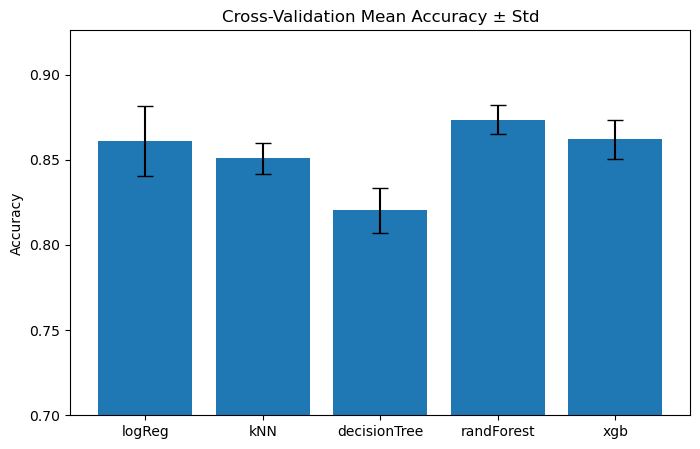


Best model: randForest
Test accuracy: 0.857

Best parameters: {'model__max_depth': 15, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       114
           1       0.88      0.88      0.88       173

    accuracy                           0.86       287
   macro avg       0.85      0.85      0.85       287
weighted avg       0.86      0.86      0.86       287



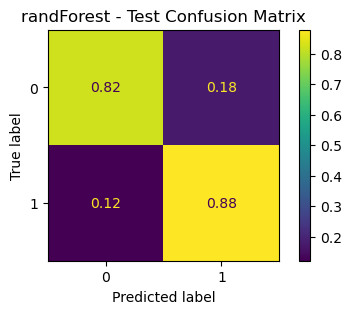

-0.0034843205574913716


C:\Users\isade\AppData\Local\Temp\ipykernel_7800\3719638250.py:272: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(scores[sorted_idx].T, vert=False, labels=ftr_names[sorted_idx])


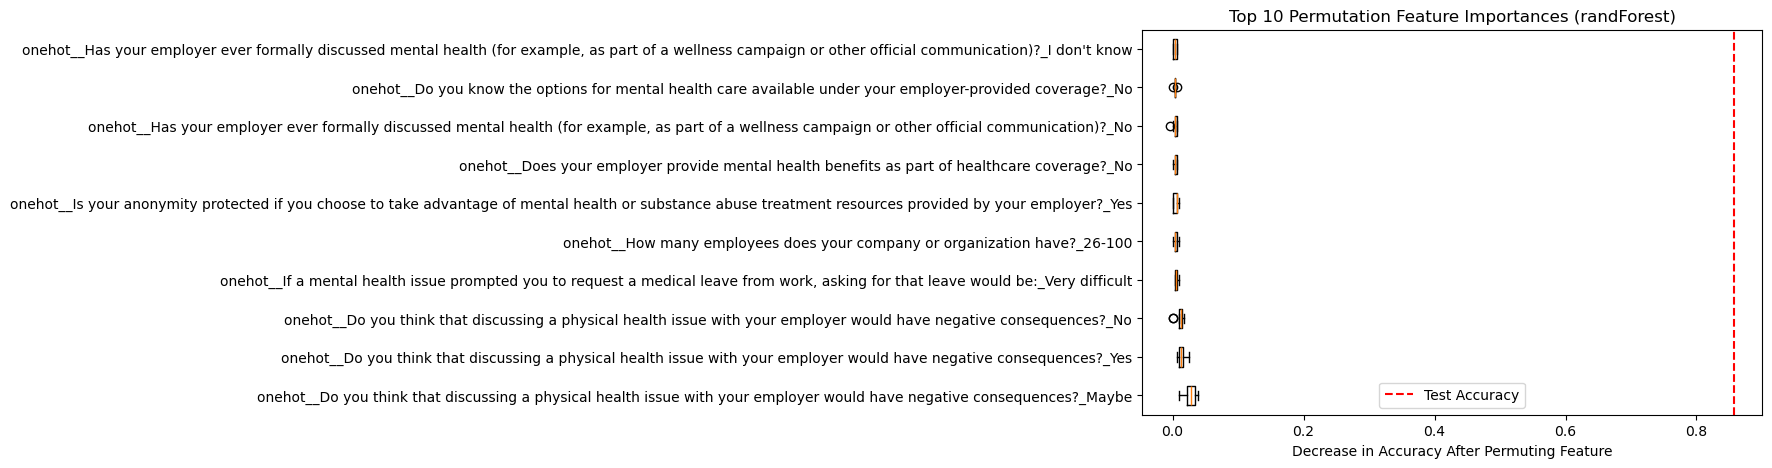

In [16]:
#preprocessing 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier


continuous_ftrs= ["What is your age?"]

ordinal_ftrs= ["If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?"]
ordinal_cats = [["1-25%", "26-50%", "51-75%", "76-100%"]]

categorical_ftrs = ["Are you self-employed?",
"How many employees does your company or organization have?",
"Is your employer primarily a tech company/organization?",
"Is your primary role within your company related to tech/IT?",
"Does your employer provide mental health benefits as part of healthcare coverage?",
"Do you know the options for mental health care available under your employer-provided coverage?",
"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",
"Does your employer offer resources to learn more about mental health concerns and options for seeking help?",
"Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?",
"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",
"Do you think that discussing a mental health disorder with your employer would have negative consequences?",
"Do you think that discussing a physical health issue with your employer would have negative consequences?",
"Would you feel comfortable discussing a mental health disorder with your coworkers?",
"Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?",
"Do you feel that your employer takes mental health as seriously as physical health?",
"Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?",
"Do you have medical coverage (private insurance or state-provided) which includes treatment of a mental health issues?",
"Do you know local or online resources to seek help for a mental health disorder?",
"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?",
"If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?",
"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?",
"If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",
"Do you believe your productivity is ever affected by a mental health issue?",
"Do you have previous employers?",
"Have your previous employers provided mental health benefits?",
"Were you aware of the options for mental health care provided by your previous employers?",
"Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?",
"Did your previous employers provide resources to learn more about mental health issues and how to seek help?",
"Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?",
"Do you think that discussing a mental health disorder with previous employers would have negative consequences?",
"Do you think that discussing a physical health issue with previous employers would have negative consequences?",
"Would you have been willing to discuss a mental health issue with your previous co-workers?",
"Would you have been willing to discuss a mental health issue with your direct supervisor(s)?",
"Did you feel that your previous employers took mental health as seriously as physical health?",
"Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?",
"Would you be willing to bring up a physical health issue with a potential employer in an interview?",
"Would you bring up a mental health issue with a potential employer in an interview?",
"Do you feel that being identified as a person with a mental health issue would hurt your career?",
"Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?",
"How willing would you be to share with friends and family that you have a mental illness?",
"Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?",
"Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?",
"Do you have a family history of mental illness?",
"Have you had a mental health disorder in the past?",
"Do you currently have a mental health disorder?",
"If yes, what condition(s) have you been diagnosed with?",
"If maybe, what condition(s) do you believe you have?",
"Have you been diagnosed with a mental health condition by a medical professional?",
"If so, what condition(s) were you diagnosed with?",
"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?",
"If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",
"What is your gender?",
"What country do you live in?",
"What US state or territory do you live in?",
"What country do you work in?",
"What US state or territory do you work in?",
"Which of the following best describes your work position?",
"Do you work remotely?"]

print("Original data shape:", df.shape)


# sk_ordinal = OrdinalEncoder(categories=ordinal_cats, handle_unknown="use_encoded_value", unknown_value=-1)
# ordinal_result = sk_ordinal.fit_transform(df[ordinal_ftrs])  


# print(df[categorical_ftrs].isna().sum())
# df[categorical_ftrs] = df[categorical_ftrs].astype(str)
# sk_oh = OneHotEncoder(sparse_output = False, handle_unknown="ignore")
# oh_result = sk_oh.fit_transform(df[categorical_ftrs])

# sk_scalar = StandardScaler()
# scalar_result = sk_scalar.fit_transform(df[continuous_ftrs])

# print("Ordinal features shape:", ordinal_result.shape)
# print("One-hot features shape:", oh_result.shape)
# print("Scaled continuous features shape:", scalar_result.shape)

preprocess = ColumnTransformer(
    transformers=[
        ("ord", OrdinalEncoder(
            categories=ordinal_cats,
            handle_unknown="use_encoded_value",
            unknown_value=-1
        ), ordinal_ftrs),

        ("onehot", OneHotEncoder(
            sparse_output=False,
            handle_unknown="ignore"
        ), categorical_ftrs),

        ("scale", StandardScaler(), continuous_ftrs),
    ]
)

#ML models
models = {
    "logReg": LogisticRegression(max_iter=5000), 
    "kNN": KNeighborsClassifier(), 
    "decisionTree": DecisionTreeClassifier(), 
    "randForest": RandomForestClassifier(), 
    "xgb": XGBClassifier()   
}



# hyperparameters = {"learning_rate": [0.03],
#                 "n_estimators": [1,30,100,300,1000],
#                 "seed": [0],
#                 "missing": [np.nan], 
#                 "max_depth": [1,3,10,30,100],
#                 "colsample_bytree": [0.9],              
#                 "subsample": [0.66]}


#param grid
logReg_grid = { 
    'model__penalty': ['l1'], 
    'model__C': np.logspace(-3,3,7), 
    'model__solver': ['saga'],
    'model__max_iter': [10000]
}

kNN_grid = { 
    "model__n_neighbors": [3, 5, 7, 9],
    "model__weights": ["uniform", "distance"],
    "model__p": [1, 2]
}

decisionTree_grid = {
    "model__max_depth": [None, 5, 10, 20],
    "model__min_samples_split": [2, 10],
    "model__min_samples_leaf": [1, 4],
}

randForest_grid = {
    'model__max_depth': [None, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__n_estimators': [100, 200, 300]
}

xgb_grid = { #check
    "model__learning_rate": [0.03],
    "model__n_estimators": [100, 300, 1000],
    "model__max_depth": [3, 5, 10],
    "model__colsample_bytree": [0.5, 0.7, 0.9],
    "model__subsample": [0.5, 0.66, 1.0]
}

grids = {
    "logReg": logReg_grid,
    "kNN": kNN_grid,
    "decisionTree": decisionTree_grid,
    "randForest": randForest_grid,
    "xgb": xgb_grid
}



cv_results = {name: [] for name in models}
predictions = []


for fold, (train_idx, val_idx) in enumerate(kf.split(X_other, y_other), 1):
    print(f"\nFold {fold}")
    X_train, X_val = X_other.iloc[train_idx], X_other.iloc[val_idx]
    y_train, y_val = y_other.iloc[train_idx], y_other.iloc[val_idx]
    
    for model_name, model in models.items():
        pipe = Pipeline([("preprocess", preprocess), ("model", model)])
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_val)
        
        # CV accuracy
        acc = accuracy_score(y_val, y_pred)
        cv_results[model_name].append(acc)
        print(f"{model_name} val acc: {acc:.3f}")
        
        # Save predictions per model
        fold_df = X_val.copy()
        fold_df["true"] = y_val.values
        fold_df["pred"] = y_pred
        fold_df["model_name"] = model_name
        fold_df["fold"] = fold
        predictions.append(fold_df)

master_df = pd.concat(predictions, ignore_index=True)

for model_name, scores in cv_results.items():
    print(f"{model_name}: mean={np.mean(scores):.3f}, std={np.std(scores):.3f}")

models_list = list(cv_results.keys())
means = [np.mean(cv_results[m]) for m in models_list]
stds = [np.std(cv_results[m]) for m in models_list]

# plt.figure(figsize=(8,5))
# plt.bar(models_list, means, yerr=stds, capsize=6)
# plt.ylabel("Accuracy")
# plt.title("Cross-Validation Mean Accuracy ± Std")
# plt.grid(axis="y", linestyle="--", alpha=0.5)
# plt.show()


fig, ax = plt.subplots(figsize=(8,5))
ax.bar(models_list, means, yerr=stds, capsize=6)
ax.set_ylabel("Accuracy")
ax.set_ylim(0.7)
ax.set_title("Cross-Validation Mean Accuracy ± Std")
plt.show()


best_model_name = max(cv_results, key=lambda k: np.mean(cv_results[k]))
param_grid = grids[best_model_name]
best_model = models[best_model_name]

pipe_best = Pipeline([("preprocess", preprocess), ("model", best_model)])

grid = GridSearchCV(pipe_best, param_grid, cv=5)
grid.fit(X_other, y_other)
#pipe_best.fit(X_other, y_other)
best_tuned_model = grid.best_estimator_
y_pred_test = pipe_best.predict(X_test)
acc = accuracy_score(y_test, y_pred_test)

print(f"\nBest model: {best_model_name}")
print(f"Test accuracy: {acc:.3f}\n")
print("Best parameters:", grid.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

#confusion matrix
cm = confusion_matrix(y_test, y_pred_test, normalize="true")
disp = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax)
plt.title(f"{best_model_name} - Test Confusion Matrix")
plt.show()

#feature importance
feat_import = permutation_importance(pipe_best, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')
scores = feat_import.importances
ftr_names = pipe_best.named_steps['preprocess'].get_feature_names_out()
mean_importances = scores.mean(axis=1)

sorted_idx = np.argsort(mean_importances)[::-1][:10]


print(scores[sorted_idx].T.min())

plt.figure(figsize=(8,5))
plt.boxplot(scores[sorted_idx].T, vert=False, labels=ftr_names[sorted_idx])
plt.axvline(pipe_best.score(X_test, y_test), color='red', linestyle='--', label='Test Accuracy')
plt.title(f"Top 10 Permutation Feature Importances ({best_model_name})")
plt.xlabel("Decrease in Accuracy After Permuting Feature")
plt.legend()
plt.show()



